In [12]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif  # For feature selection
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt

In [2]:
gold = pd.read_csv('/workspaces/setproject/set1.csv')

In [20]:
X = gold[["Open", "High","Low"]].dropna() # Select features for analysis
y = gold["Price"]  # Target variable (gold price)
selector = SelectKBest(f_classif, k=1)  # Select the 2 most relevant features
X_selected = selector.fit_transform(X, y)

In [21]:
print(selector.scores_)
print(selector.get_support())

[ 575.08085339  993.2975863  1624.99148598]
[False False  True]


In [22]:
pca = PCA(n_components=1)  # Reduce to 1 component for visualization
X_reduced = pca.fit_transform(X_selected)

In [23]:
print(pd.DataFrame(X_reduced, columns=["PC1"]))

             PC1
0     388.913047
1     380.313047
2     373.313047
3     377.113047
4     374.713047
...          ...
2578  217.913047
2579  214.413047
2580  199.113047
2581  233.413047
2582  241.213047

[2583 rows x 1 columns]


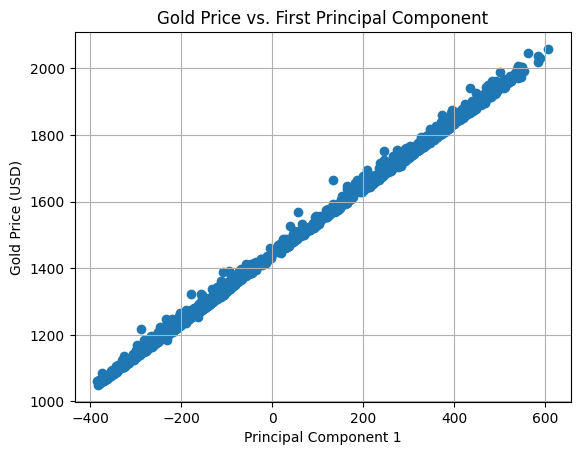

In [24]:
plt.scatter(X_reduced, y)
plt.xlabel("Principal Component 1")
plt.ylabel("Gold Price (USD)")
plt.title("Gold Price vs. First Principal Component")
plt.grid(True)
plt.show()